# Ejercicio 7
Utilizando el conjunto de datos proporcionado en la carpeta comprimida ZIP realice un notebook en Python o R donde haga un resumen que contenga la siguiente información:

## a. Análisis descriptivo de las variables manner_of_death y armed utilizando características sociodemográficas (age, gender, race, etc)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
policias = pd.read_csv('PoliciaAsesinatos.csv', encoding='cp1252')
policias.head()

In [2]:
policias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [3]:
100*policias['manner_of_death'].value_counts()/len(policias['manner_of_death'])
# El 93,21% de las maneras de morir fueron por disparo 

shot                93.21499
shot and Tasered     6.78501
Name: manner_of_death, dtype: float64

In [4]:
100*policias['armed'].value_counts()/len(policias['armed'])
# El 55,14% estaba armado con pistola, mientras que el 14.71% con cuchillo

gun             55.147929
knife           14.714004
vehicle          6.982249
unarmed          6.745562
undetermined     4.615385
                  ...    
hand torch       0.039448
garden tool      0.039448
pole             0.039448
pick-axe         0.039448
pen              0.039448
Name: armed, Length: 68, dtype: float64

Se toman ahora solo gun y knife que son los armas más usadas en el PoliciaAsesinado.csv 

Text(0, 0.5, 'Número de personas')

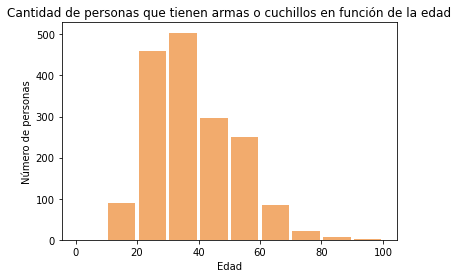

In [5]:
guns_and_knife = policias[(policias["armed"]=="gun")|(policias["armed"]=="knife")]
guns_and_knife['age'].value_counts()
a,b = int(min(guns_and_knife['age'])),int(max(guns_and_knife['age']) + 2)
intervalos = [0, 10, 20, 30, 40,50,60,70,80,90,100] 
plt.hist(guns_and_knife['age'],color='#F2AB6D',bins=intervalos, rwidth=0.90)
plt.title("Cantidad de personas que tienen armas o cuchillos en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Número de personas")

In [6]:
guns_and_knife['age'].value_counts()

25.0    64
31.0    58
36.0    58
33.0    57
29.0    56
        ..
91.0     1
75.0     1
14.0     1
80.0     1
79.0     1
Name: age, Length: 70, dtype: int64

Se analiza la información según el género de la persona

Text(0, 0.5, 'Número de personas')

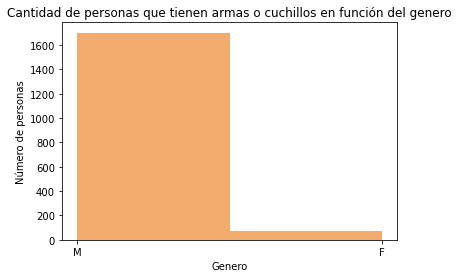

In [7]:
plt.hist(guns_and_knife['gender'],color='#F2AB6D',bins=2,align="mid")
plt.title("Cantidad de personas que tienen armas o cuchillos en función del genero")
plt.xlabel("Genero")
plt.ylabel("Número de personas")

Se analiza según los signos de una enfermedad mental

In [ ]:
guns_and_knife["signs_of_mental_illness"] = guns_and_knife["signs_of_mental_illness"].astype(str)

Text(0, 0.5, 'Número de personas')

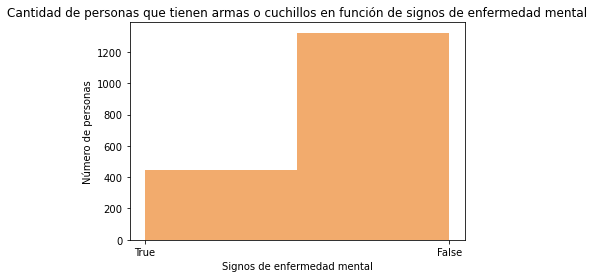

In [9]:
plt.hist(guns_and_knife["signs_of_mental_illness"],color='#F2AB6D',bins=2,align="mid")
plt.title("Cantidad de personas que tienen armas o cuchillos en función de signos de enfermedad mental")
plt.xlabel("Signos de enfermedad mental")
plt.ylabel("Número de personas")

Se analiza según la raza de las personas

In [ ]:
guns_and_knife.loc[guns_and_knife["race"]=='A', 'race'] = 'Asian'
guns_and_knife.loc[guns_and_knife["race"]=='W', 'race'] = 'White'
guns_and_knife.loc[guns_and_knife["race"]=='B', 'race'] = 'Black'
guns_and_knife.loc[guns_and_knife["race"]=='H', 'race'] = 'Hispanic'
guns_and_knife["race"].value_counts()

In [ ]:
guns_and_knife["race"] = guns_and_knife["race"].astype(str)
plt.hist(guns_and_knife["race"],color='#F2AB6D',bins=14,align="mid")
plt.title("Cantidad de personas que tienen armas o cuchillos en función de la raza")
plt.xlabel("Raza")
plt.ylabel("Número de personas")

In [12]:
policias['threat_level'].value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

manner_of_death con la variable age

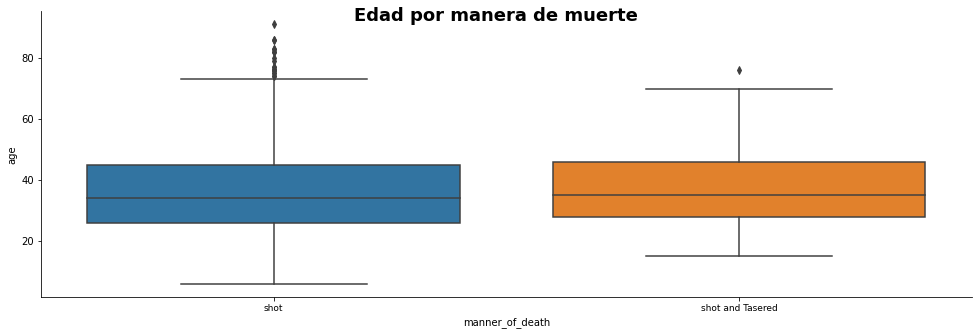

In [13]:
g = sns.catplot(x = "manner_of_death", y = "age",
              height = 4.5, aspect = 3,
              kind = "box", data = policias)
g.fig.suptitle("Edad por manera de muerte",
               fontsize = 18,
               fontweight = "bold")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.show()

In [14]:
policias.groupby(['manner_of_death'])[['age']].describe()

age                                                    
                   count       mean        std   min   25%   50%   75%   max
manner_of_death                                                             
shot              2290.0  36.574672  13.090166   6.0  26.0  34.0  45.0  91.0
shot and Tasered   168.0  37.023810  12.221485  15.0  28.0  35.0  46.0  76.0

Se observa como el promedio de aquellos que mueren por shot es ligeramente inferior que aquellos que mueren por shot y Tasered. Mientras que la desviación estándar es mayor en los que mueren por shot, aproximadamente presenta una dispersión de 13 años, y los que mueren por shot y Tasered presentan una desviación de 12 años.

manner_of_death con la variable gender

In [15]:
pd.crosstab(index=policias['gender'],
            columns=policias['manner_of_death'], margins=True)

manner_of_death,shot,shot and Tasered,All
gender,,,
F,102,5,107
M,2261,167,2428
All,2363,172,2535


In [16]:
pd.crosstab(index=policias['gender'],columns=policias['manner_of_death'],
            margins=True).apply(lambda r: r/len(policias['gender']) *100,axis=1)

manner_of_death,shot,shot and Tasered,All
gender,,,
F,4.023669,0.197239,4.220907
M,89.191321,6.587771,95.779093
All,93.214990,6.785010,100.000000


In [17]:
pd.crosstab(index=policias['gender'],columns=policias['manner_of_death'], normalize = "index")

manner_of_death,shot,shot and Tasered
gender,,
F,0.953271,0.046729
M,0.931219,0.068781


En la muestra recolectada hay mas participación de hombres, ya que representan el 95,77%. Se observa que son mas los hombres que mueren por disparo, aproximadamente el 89,19%. El 4% de las personas son mujeres que mueren por disparo.

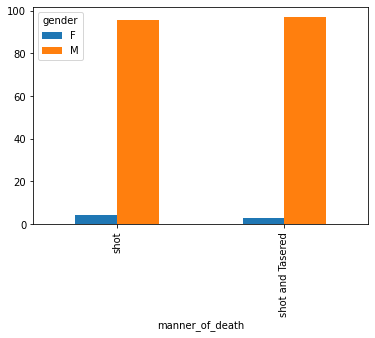

In [18]:
plot = pd.crosstab(index=policias['manner_of_death'],
            columns=policias['gender']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

manner_of_death con la variable race

In [19]:
pd.crosstab(index=policias['race'],columns=policias['manner_of_death'],normalize='index')

manner_of_death,shot,shot and Tasered
race,,
A,0.871795,0.128205
B,0.933657,0.066343
H,0.924350,0.075650
N,1.000000,0.000000
O,0.857143,0.142857
W,0.935054,0.064946


In [20]:
pd.crosstab(index=policias['race'],
            columns=policias['manner_of_death'], margins=True)

manner_of_death,shot,shot and Tasered,All
race,,,
A,34,5,39
B,577,41,618
H,391,32,423
N,31,0,31
O,24,4,28
W,1123,78,1201
All,2180,160,2340


In [21]:
pd.crosstab(index=policias['race'],columns=policias['manner_of_death'],
            margins=True).apply(lambda r: r/len(policias['race'].dropna()) *100,axis=1)

manner_of_death,shot,shot and Tasered,All
race,,,
A,1.452991,0.213675,1.666667
B,24.658120,1.752137,26.410256
H,16.709402,1.367521,18.076923
N,1.324786,0.000000,1.324786
O,1.025641,0.170940,1.196581
W,47.991453,3.333333,51.324786
All,93.162393,6.837607,100.000000


El 48% aproximadamente de las personas que mueren, mueren a causa de disparos y son de raza blanca (W), seguidamente están las personas negras (B) con un 24,65% de muestres a causa de disparos. Aquellas razas que tienen menos proporción de mortalidad son Asiáticos y otros diferentes. 

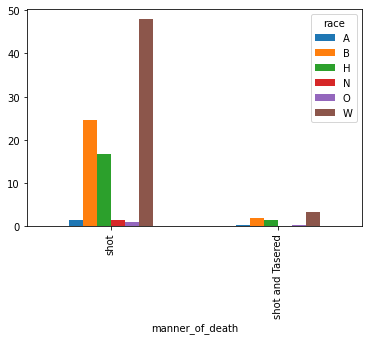

In [22]:
plot = pd.crosstab(index=policias['manner_of_death'],
            columns=policias['race']).apply(lambda r: r/len(policias['race'].dropna()) *100,
                                              axis=1).plot(kind='bar')

armed con la variable age

In [23]:
armed_age = policias.groupby(['armed'])[['age']].describe()
armed_age[armed_age['age']['count']>1]

age                                                  \
                      count       mean        std   min    25%   50%    75%   
armed                                                                         
Taser                   9.0  44.333333  15.459625  20.0  36.00  38.0  57.00   
ax                      9.0  42.000000  15.083103  21.0  35.00  40.0  56.00   
baseball bat            8.0  37.250000  15.266677  19.0  27.50  36.0  41.25   
beer bottle             2.0  43.500000   2.121320  42.0  42.75  43.5  44.25   
blunt object            4.0  45.250000  14.728091  25.0  40.75  48.0  52.50   
box cutter              7.0  43.428571   7.546680  33.0  40.00  42.0  47.50   
brick                   2.0  36.000000   7.071068  31.0  33.50  36.0  38.50   
chain saw               2.0  36.500000   0.707107  36.0  36.25  36.5  36.75   
crossbow                6.0  48.666667  11.325487  31.0  42.00  51.5  58.00   
gun                  1356.0  37.813422  13.676489  14.0  27.00  35.0  47.00   
gun and knife           5.0  36.400000   9.914636  24.0  32.00  33.0  45.00   
guns and explosives     3.0  35.000000   2.000000  33.0  34.00  35.0  36.00   
hammer                  7.0  33.571429   8.810167  20.0  30.50  32.0  36.50   
hatchet                 6.0  33.833333  10.457852  23.0  26.00  31.5  40.00   
hatchet and gun         2.0  39.500000   4.949747  36.0  37.75  39.5  41.25   
knife                 357.0  37.173669  12.196568  15.0  27.00  36.0  46.00   
machete                17.0  37.882353  15.479351  25.0  28.00  32.0  43.00   
meat cleaver            2.0  30.500000  12.020815  22.0  26.25  30.5  34.75   
metal object            2.0  24.000000   2.828427  22.0  23.00  24.0  25.00   
metal pipe              7.0  39.142857   6.962485  31.0  33.00  40.0  44.00   
metal pole              2.0  31.000000   2.828427  29.0  30.00  31.0  32.00   
metal stick             3.0  42.000000   8.660254  32.0  39.50  47.0  47.00   
piece of wood           2.0  22.500000   6.363961  18.0  20.25  22.5  24.75   
rock                    3.0  39.666667  13.279056  32.0  32.00  32.0  43.50   
scissors                3.0  37.666667  10.503968  27.0  32.50  38.0  43.00   
screwdriver             5.0  34.200000   5.974948  28.0  30.00  33.0  37.00   
sharp object            2.0  32.500000  12.020815  24.0  28.25  32.5  36.75   
shovel                  2.0  53.500000  16.263456  42.0  47.75  53.5  59.25   
sword                   8.0  30.750000   9.632534  21.0  24.25  28.0  35.50   
toy weapon            103.0  35.116505  13.369046  13.0  25.00  33.0  45.00   
unarmed               170.0  30.882353  10.915937   6.0  23.00  29.0  37.00   
undetermined          112.0  34.205357  11.811689  16.0  25.00  32.0  41.00   
unknown weapon         16.0  31.750000  13.369119  16.0  21.00  31.5  36.00   
vehicle               172.0  33.168605  10.506503  15.0  25.00  32.0  39.00   

                           
                      max  
armed                      
Taser                69.0  
ax                   62.0  
baseball bat         66.0  
beer bottle          45.0  
blunt object         60.0  
box cutter           54.0  
brick                41.0  
chain saw            37.0  
crossbow             59.0  
gun                  91.0  
gun and knife        48.0  
guns and explosives  37.0  
hammer               49.0  
hatchet              50.0  
hatchet and gun      43.0  
knife                76.0  
machete              83.0  
meat cleaver         39.0  
metal object         26.0  
metal pipe           49.0  
metal pole           33.0  
metal stick          47.0  
piece of wood        27.0  
rock                 55.0  
scissors             48.0  
screwdriver          43.0  
sharp object         41.0  
shovel               65.0  
sword                50.0  
toy weapon           77.0  
unarmed              73.0  
undetermined         75.0  
unknown weapon       64.0  
vehicle              63.0

Se extraen todos los tipos de armas que tienen solamente una frecuencia de 1. Se observa que pistola y cuchillo son las dos armas que mas se usan. Las personas con menor edad usan armas como piezas de madera y objeto metálico. Las personas con mayor edad usan palas y ballestas. 

In [24]:
[policias['armed'].value_counts()>1]

[gun              True
 knife            True
 vehicle          True
 unarmed          True
 undetermined     True
                 ...  
 hand torch      False
 garden tool     False
 pole            False
 pick-axe        False
 pen             False
 Name: armed, Length: 68, dtype: bool]

In [25]:
armed2 = pd.Series(policias['armed'])

## b.	Evolución en el tiempo de las muertes por estado (Seleccione los 5 estados con más muertes para facilitar la visualización)

In [26]:
policias['state'].value_counts()

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
IN     43
WI     43
KY     43
NV     42
OR     38
MD     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
MS     23
UT     23
MA     22
ID     17
AK     15
NE     15
ME     13
IA     12
MT     11
HI     11
DC     11
SD     10
CT      9
DE      8
WY      8
NH      7
ND      4
VT      3
RI      2
Name: state, dtype: int64

Los 5 estados con mas muertes son CA, TX, FL, AZ y OH. Posteriormente se agrega el número de muertes a frecuencia mensual para cada uno de los 5 estados, esto debido a que hay dias que no presentan información o tienen muy pocos datos. Se realiza esa agregación usando tablas dinámicas en Excel, cuyas hojas se utilizan a continuación:

In [27]:
series_estados = pd.read_excel('ejercicio_siete.xlsx', sheet_name = 'Series cinco estados')
series_estados.head()

,Fecha,CA,TX,FL,AZ,OH
0,2015-01,9,16,1,5,2.0
1,2015-02,9,8,6,6,NaN
2,2015-03,22,4,7,7,4.0
3,2015-04,17,7,4,4,1.0
4,2015-05,8,6,5,3,1.0


In [28]:
series_estados.index = pd.to_datetime(series_estados['Fecha'], yearfirst=True)
series_estados = series_estados.drop(columns = ['Fecha'])
series_estados.head()

,CA,TX,FL,AZ,OH
Fecha,,,,,
2015-01-01,9,16,1,5,2.0
2015-02-01,9,8,6,6,NaN
2015-03-01,22,4,7,7,4.0
2015-04-01,17,7,4,4,1.0
2015-05-01,8,6,5,3,1.0


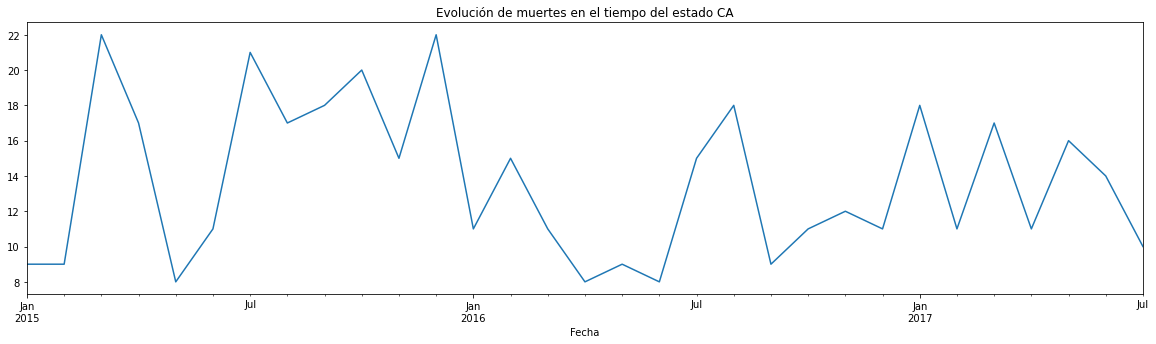

In [29]:
series_estados.CA.plot(figsize=(20,5), title="Evolución de muertes en el tiempo del estado CA")
plt.show()

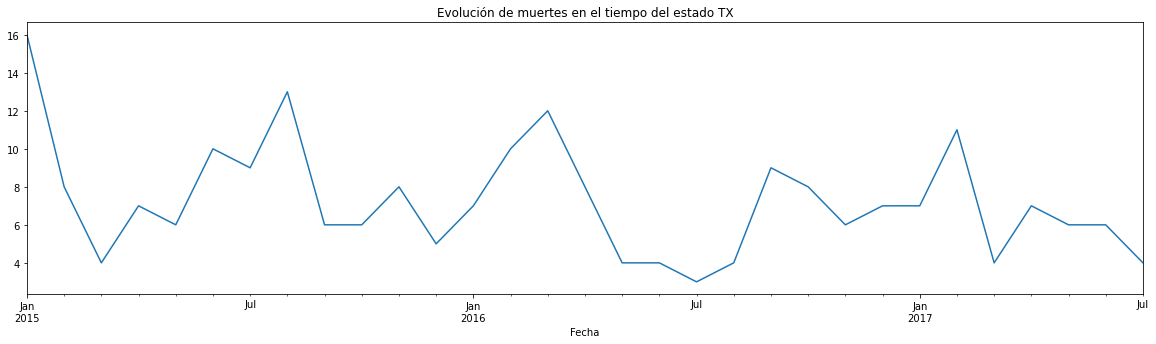

In [30]:
series_estados.TX.plot(figsize=(20,5), title="Evolución de muertes en el tiempo del estado TX")
plt.show()

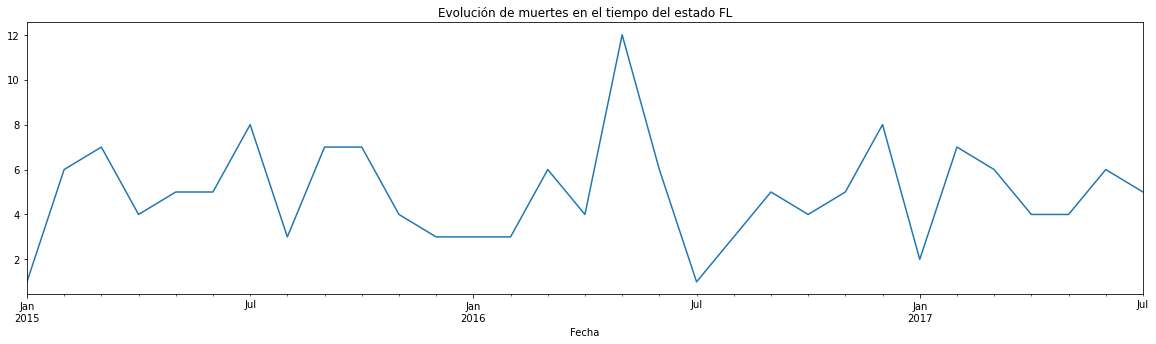

In [31]:
series_estados.FL.plot(figsize=(20,5), title="Evolución de muertes en el tiempo del estado FL")
plt.show()

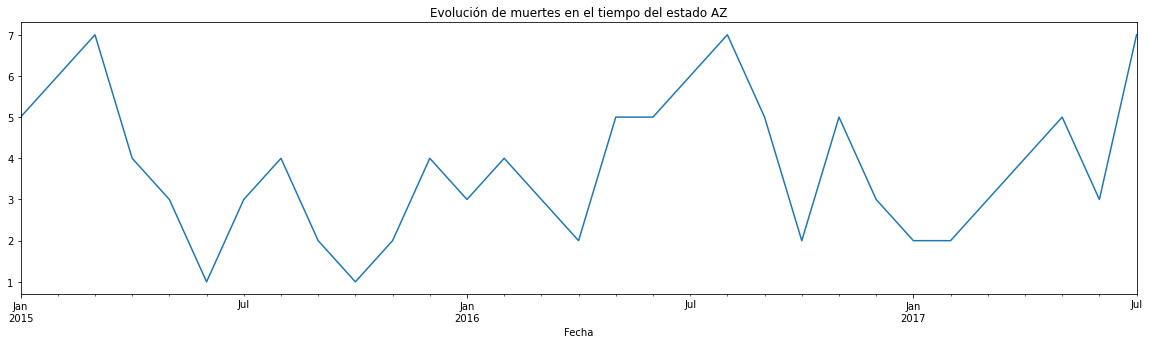

In [32]:
series_estados.AZ.plot(figsize=(20,5), title="Evolución de muertes en el tiempo del estado AZ")
plt.show()

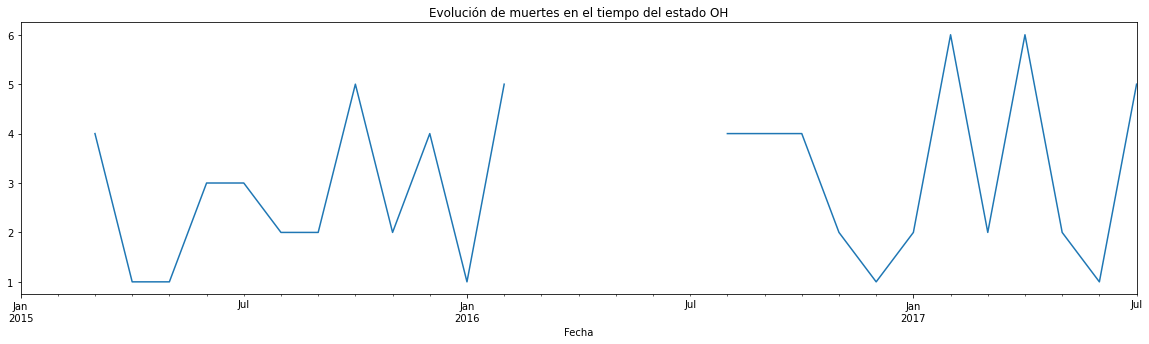

In [33]:
series_estados.OH.plot(figsize=(20,5), title="Evolución de muertes en el tiempo del estado OH")
plt.show()

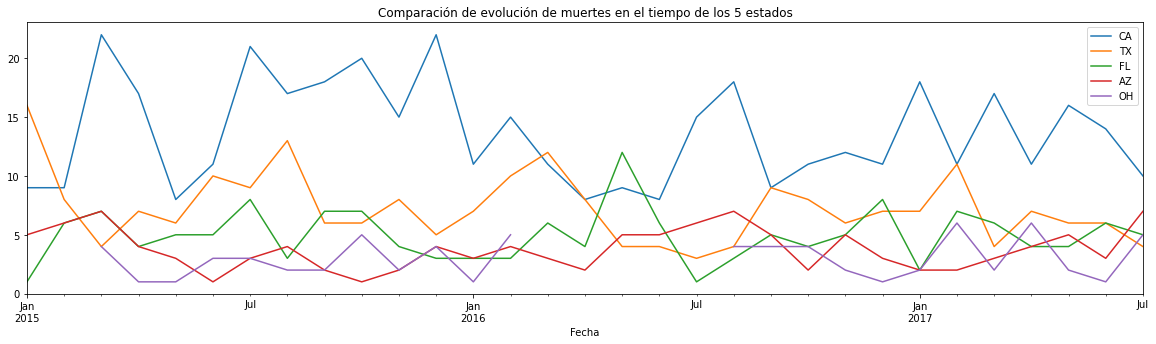

In [34]:
series_estados.CA.plot(figsize=(20,5))
series_estados.TX.plot(figsize=(20,5))
series_estados.FL.plot(figsize=(20,5))
series_estados.AZ.plot(figsize=(20,5))
series_estados.OH.plot(figsize=(20,5))
plt.title("Comparación de evolución de muertes en el tiempo de los 5 estados")
plt.legend()
plt.show()

A lo largo de los 32 meses que contempla la muestra, se observa que el estado de CA es el que mantiene mayor número de muertes, excepto en mayo de 2016 que fue superado por el estado de FL. Por otro lado los estados de AZ y OH son los que presentan menor cantidad de muertes a lo largo de los 2 años y medio. 

## c.	Realice un análisis del ingreso, escolaridad, raza y pobreza para cada uno de los 5 estados

En primera medida lo que se realiza es un filtro en el cual se eliminan datos faltantes y datos mal digitados. Posteriormente se organizan los datos en funcion del estado con mayor número de muertes (se tiene en cuenta el csv policiaAsesinatos), en el cual los cinco primeros estados son CA, TX, FL, AZ y OH. Por tanto se obtiene la base que se presenta a continuación.

In [35]:
siete = pd.read_excel('ejercicio_siete.xlsx', sheet_name = 'Cinco estados')
siete = siete.drop('Unnamed: 0', axis=1)
siete.head()

,Geographic Area,City,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
0,CA,Acalanes Ridge CDP,100.0,2.5,156953.0,83.6,0.4,0.7,11.1,4.4
1,CA,Acampo CDP,77.1,0.0,152713.0,49.6,0.0,0.3,0.9,58.4
2,CA,Acton CDP,88.2,7.6,89150.0,86.4,0.8,0.9,2.0,18.1
3,CA,Adelanto city,67.5,40.3,33298.0,43.8,20.5,1.3,1.9,58.3
4,CA,Adin CDP,100.0,12.6,NaN,88.2,0.7,2.9,0.0,11.8


In [36]:
siete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic Area        5797 non-null   object 
 1   City                   5797 non-null   object 
 2   percent_completed_hs   5729 non-null   float64
 3   poverty_rate           5729 non-null   float64
 4   Median Income          5284 non-null   float64
 5   share_white            5787 non-null   float64
 6   share_black            5787 non-null   float64
 7   share_native_american  5787 non-null   float64
 8   share_asian            5787 non-null   float64
 9   share_hispanic         5787 non-null   float64
dtypes: float64(8), object(2)
memory usage: 453.0+ KB


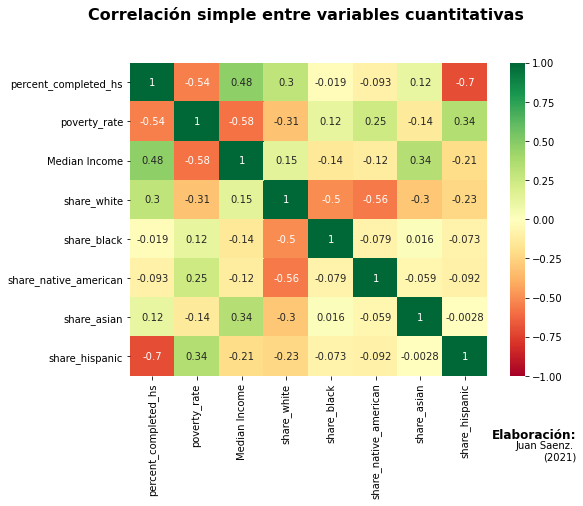

In [37]:
cuantitativas = siete[['percent_completed_hs', 'poverty_rate', 'Median Income', 'share_white', 
                       'share_black', 'share_native_american', 'share_asian', 'share_hispanic']]
fig, ax = plt.subplots(figsize = (8, 6))
fig.suptitle("Correlación simple entre variables cuantitativas",
             fontsize = 16, fontweight = "bold", x = 0.43)
sns.heatmap(cuantitativas.corr(), vmin = -1, vmax = 1,
            ax = ax, cmap = "RdYlGn",
            annot = True)
plt.subplots_adjust(top = 0.85)
fig.text(.9,-.02,
         "Elaboración:",
         fontsize = 12, fontweight = "bold",
         ha = "right")
fig.text(.9,-.07,
         "Juan Saenz. \n(2021)",
         fontsize = 10, ha = "right")
plt.show()

Sin discriminar por estado se observa que hay una fuerte correlación negativa entre el porcentaje de horas de educación completada y la proporción de personas hispanas (0,7). También una asociación significativa entre la mediana del ingreso y la tasa de pobreza (-0,58). La correlación positiva mas alta que se evidencia es entre la mediana del ingreso y el porcentaje de horas de educación completada (0,48).

In [38]:
siete[siete['Geographic Area']=='CA'].describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,1489.000000,1489.000000,1343.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,81.981666,17.091269,62680.598660,71.948969,2.693679,1.729408,5.553759,29.504724
std,17.351745,14.494183,33694.984689,18.990519,5.564448,3.303206,9.401616,26.477565
min,0.000000,0.000000,2500.000000,5.500000,0.000000,0.000000,0.000000,0.000000
25%,74.500000,6.800000,40000.000000,57.800000,0.400000,0.600000,0.800000,8.600000
50%,87.500000,13.400000,54758.000000,77.400000,0.900000,1.100000,2.000000,19.100000
75%,94.600000,23.900000,76429.000000,88.000000,2.500000,1.900000,5.900000,43.600000
max,100.000000,100.000000,250000.000000,100.000000,84.800000,66.700000,66.900000,98.900000


In [39]:
siete[siete['Geographic Area']=='TX'].describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,1700.000000,1700.000000,1538.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000
mean,75.760882,19.867235,51506.007802,82.517610,5.909873,0.660797,1.015704,39.108545
std,19.403772,16.948685,28438.464780,14.236414,10.580375,0.850340,2.682964,33.834785
min,0.000000,0.000000,2500.000000,4.900000,0.000000,0.000000,0.000000,0.000000
25%,68.800000,8.500000,34700.500000,75.900000,0.300000,0.200000,0.000000,10.400000
50%,80.250000,17.000000,44055.000000,85.800000,1.500000,0.500000,0.300000,25.900000
75%,88.800000,26.100000,59167.000000,92.600000,6.600000,0.900000,0.800000,66.350000
max,100.000000,100.000000,250000.000000,100.000000,90.500000,13.800000,40.900000,100.000000


In [40]:
siete[siete['Geographic Area']=='FL'].describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,912.000000,912.000000,884.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,85.719298,17.582346,50258.095023,78.735956,13.410273,0.456503,1.623060,16.330273
std,10.935912,12.083816,25053.358745,20.053147,18.354790,0.657251,1.696161,19.200351
min,27.300000,0.000000,11533.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,80.175000,8.875000,35191.500000,69.550000,1.500000,0.200000,0.500000,4.300000
50%,88.400000,15.000000,44680.000000,85.700000,5.800000,0.300000,1.200000,8.600000
75%,93.900000,23.725000,58902.250000,93.600000,17.900000,0.500000,2.100000,20.700000
max,100.000000,98.600000,250000.000000,100.000000,97.900000,11.800000,13.900000,95.500000


In [41]:
siete[siete['Geographic Area']=='AZ'].describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,443.000000,443.000000,372.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,80.448081,25.675395,42405.360215,59.951111,0.955778,28.635333,0.713778,20.098889
std,17.056289,21.074282,19610.498711,38.169143,2.347661,41.679305,1.202628,23.054322
min,0.000000,0.000000,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,9.600000,30000.000000,5.675000,0.000000,0.900000,0.000000,4.000000
50%,84.100000,20.300000,39000.000000,79.300000,0.400000,2.000000,0.300000,11.950000
75%,92.800000,38.400000,49930.000000,91.175000,0.900000,88.800000,0.900000,25.550000
max,100.000000,100.000000,151184.000000,100.000000,38.100000,100.000000,10.000000,98.800000


In [42]:
siete[siete['Geographic Area']=='OH'].describe()

,percent_completed_hs,poverty_rate,Median Income,share_white,share_black,share_native_american,share_asian,share_hispanic
count,1185.000000,1185.000000,1147.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,88.305654,14.843376,50527.421970,92.831508,3.930918,0.214153,0.749958,2.133530
std,7.699271,10.880146,21972.541096,12.189936,11.148877,0.326645,1.394995,3.331869
min,24.400000,0.000000,9316.000000,1.700000,0.000000,0.000000,0.000000,0.000000
25%,84.700000,6.800000,37500.000000,93.550000,0.200000,0.000000,0.000000,0.600000
50%,89.600000,13.300000,45556.000000,96.600000,0.700000,0.100000,0.300000,1.300000
75%,93.500000,20.500000,57513.000000,97.900000,2.100000,0.300000,0.800000,2.300000
max,100.000000,90.900000,250000.000000,100.000000,95.500000,4.800000,15.300000,31.300000


Se observa que en promedio el porcentaje de horas completadas es mayor en el área geográfica de OH con 88,3 horas. Seguidamente está el estado Fl con 81,71. El estado que ocupa el último lugar es TX con 75,76 horas en promedio. Se presentan desviaciones estándar muy dispersas y diferentes entre estados, el estado de OH tiene desviación estándar de 7,7 horas aproximadamente, mientras que el estado de TX presenta una dispersión de su educación en 19,4 horas.

Con relación a la tasa de pobreza ésta oscila entre 14,84 a 25,67 de los estados de OH y AZ respectivamente. Presenta una dispersión considerable con una desviación estándar de entre 10,88 a 21,07 con los mismos dos estados nombrados anteriormente.

El estado que presenta el ingreso promedio mas alto es CA con 62680.59 USD. El estado con menor ingreso promedio es AZ con 42405.36 USD.

El estado con la mayor proporción de personas negras es FL, con 13.41% de la población aproximadamente. El estado con menos cantidad de persoans negras es AZ con el 0.95% de su población.

Ahora bien, con relación a la proporción de raza Nativos americanos, el estado AZ alberga la mayor cantidad de población, con el 28.63% del total. El estado OH es el que menos proporción presenta de Nativos americanos, el 0.21% de su población.

CA es el estado con mayor proporción de raza asiática, con el 5.55% de su población. El estado con menos personas asiáticas en su territorio es AZ con el 0.71% de su población.

Por último, el estado con mas personas oriundas de la raza hispana es TX con el 39.101% de su población. De la proporción de hispanos viviendo en altún territorio, el estado de OH es el que menos alberga, con 2.13% de su población.

In [43]:
siete.describe(include = [object])

,Geographic Area,City
count,5797,5797
unique,5,5629
top,TX,Fairfield city
freq,1736,3


In [44]:
(siete['Geographic Area'].value_counts()/len(siete))*100
# El estado con mayor proporción de datos es TX con el 29,94% del total. El que tiene la menor participación es AZ con 
#el 7,76% del total.

TX    29.946524
CA    26.030706
OH    20.476108
FL    15.784026
AZ     7.762636
Name: Geographic Area, dtype: float64

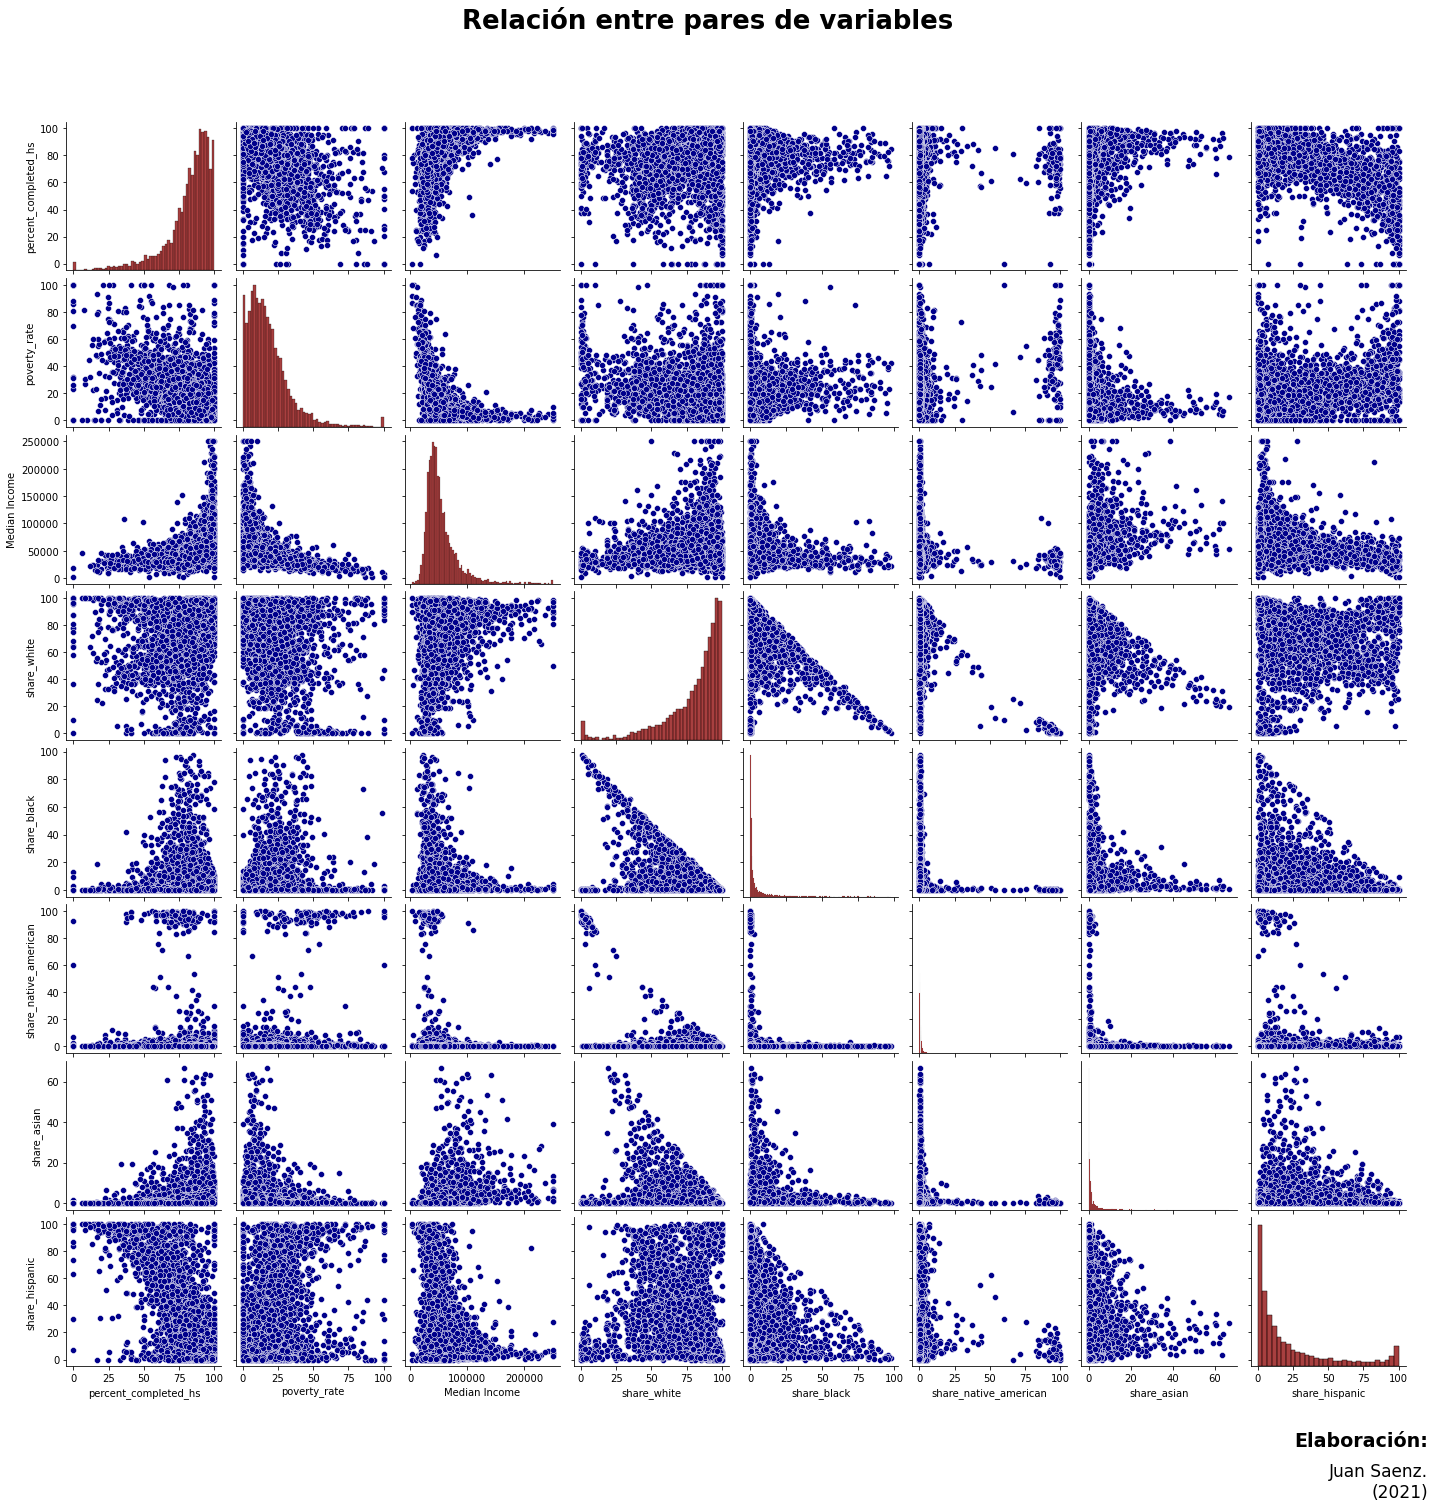

In [45]:
g = sns.pairplot(siete.drop(columns = ['Geographic Area', 'City']),
                 plot_kws = {"color": "darkblue"},
                 diag_kws = {"color":"darkred"})
g.fig.suptitle("Relación entre pares de variables",
               fontsize = 26,
               fontweight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 19,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.055,
           "Juan Saenz.\n(2021)",
           fontsize = 17, ha = "right")
plt.show()

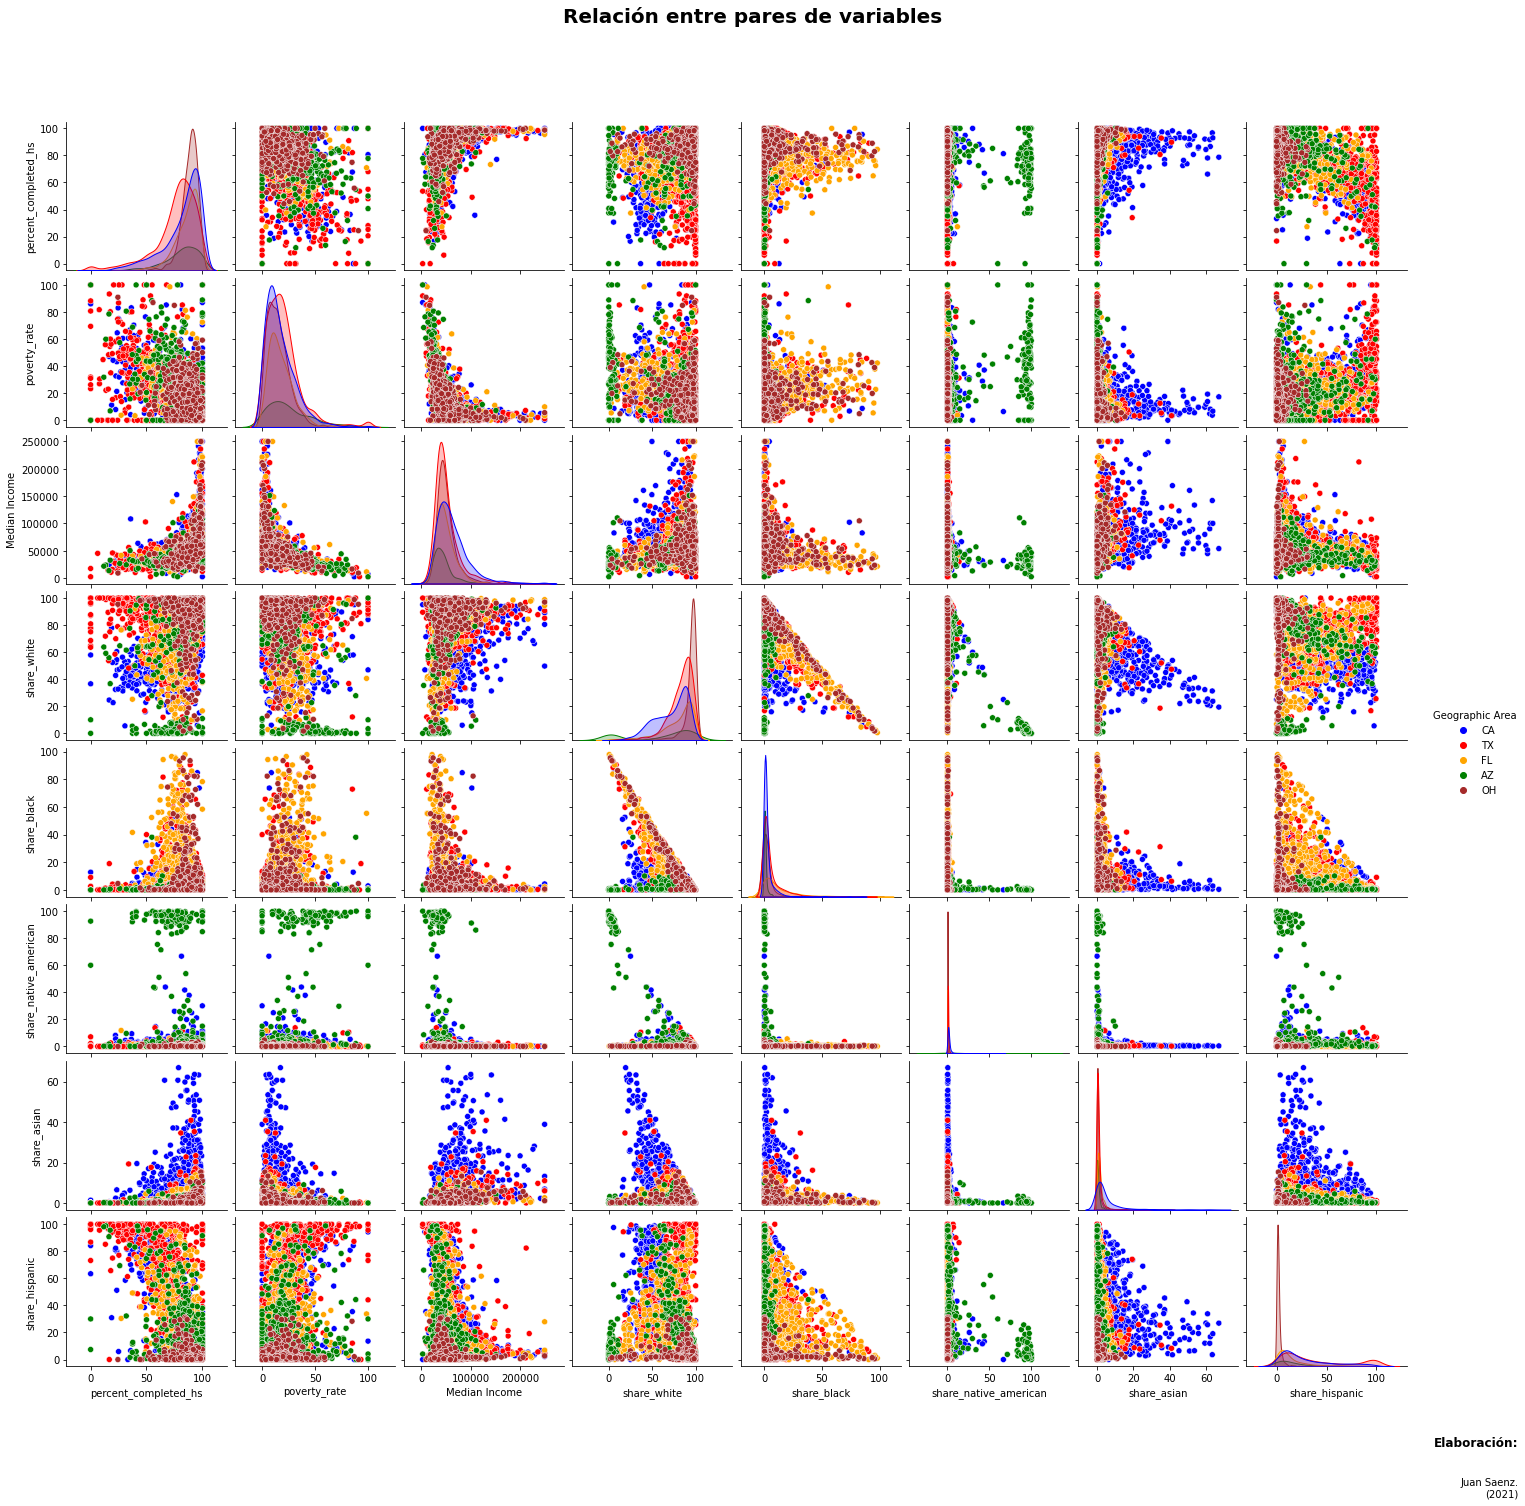

In [46]:
pal = {"CA":"blue", "TX":"red", "FL": "orange", "AZ": "green", "OH": "brown"}
orden = ['CA', 'TX', 'FL', 'AZ', 'OH']
g = sns.pairplot(siete, vars = ['percent_completed_hs', 'poverty_rate','Median Income', 'share_white', 'share_black', 
                                'share_native_american', 'share_asian', 'share_hispanic'],
                 hue = 'Geographic Area', hue_order = orden,
                 palette = pal)
g.fig.suptitle("Relación entre pares de variables",
               fontsize = 20,
               fontweight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 12,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.055,
           "Juan Saenz.\n(2021)",
           fontsize = 10, ha = "right")
plt.show()

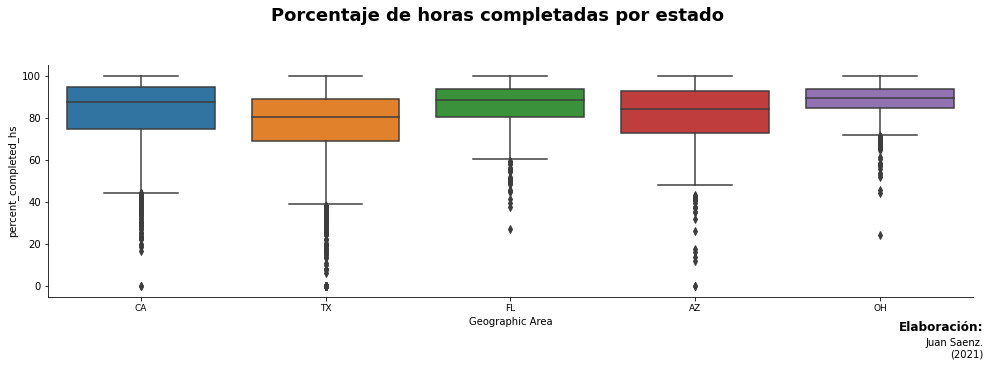

In [47]:
g = sns.catplot(x = 'Geographic Area', y = 'percent_completed_hs',
                height = 4.5, aspect = 3,
                kind = "box", data = siete)
g.fig.suptitle("Porcentaje de horas completadas por estado",
               fontsize = 18,
               fontweight = "bold")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.subplots_adjust(top=0.8)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 12,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.1,
           "Juan Saenz.\n(2021)",
           fontsize = 10, ha = "right")
plt.show()

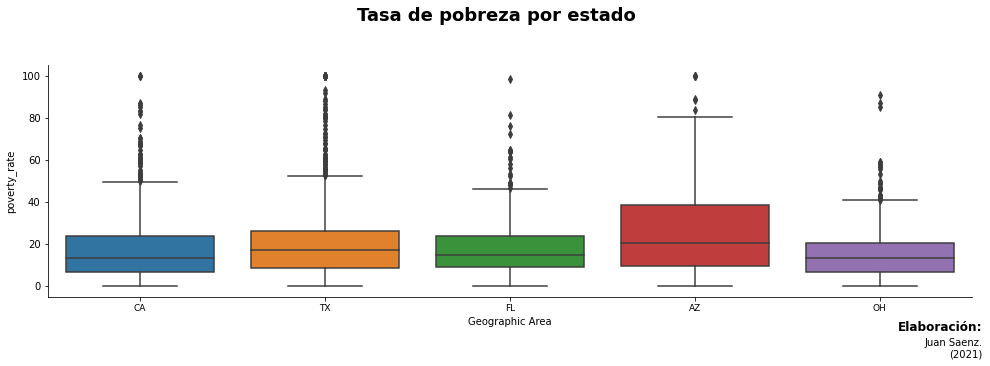

In [48]:
g = sns.catplot(x = 'Geographic Area', y = 'poverty_rate',
                height = 4.5, aspect = 3,
                kind = "box", data = siete)
g.fig.suptitle("Tasa de pobreza por estado",
               fontsize = 18,
               fontweight = "bold")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.subplots_adjust(top=0.8)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 12,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.1,
           "Juan Saenz.\n(2021)",
           fontsize = 10, ha = "right")
plt.show()

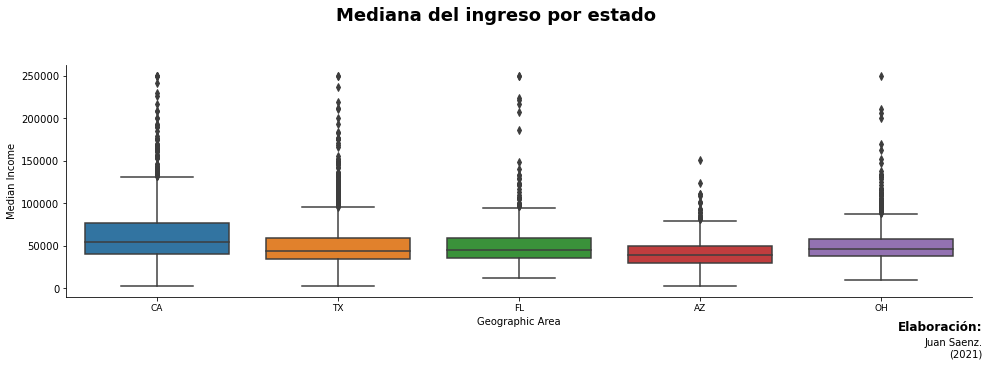

In [49]:
g = sns.catplot(x = 'Geographic Area', y = 'Median Income',
                height = 4.5, aspect = 3,
                kind = "box", data = siete)
g.fig.suptitle("Mediana del ingreso por estado",
               fontsize = 18,
               fontweight = "bold")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.subplots_adjust(top=0.8)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 12,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.1,
           "Juan Saenz.\n(2021)",
           fontsize = 10, ha = "right")
plt.show()

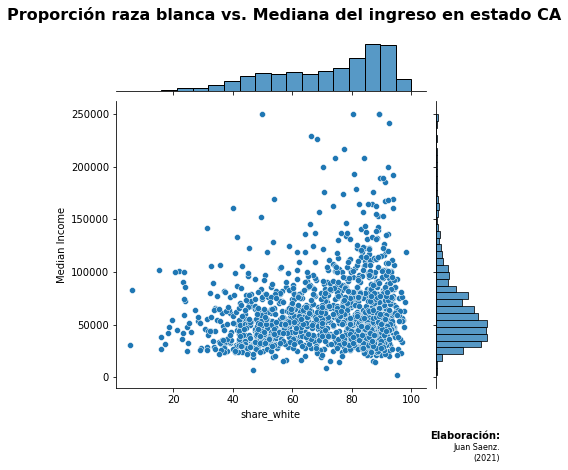

In [50]:
g = sns.jointplot(x = 'share_white',
                  y = 'Median Income',
                  data = siete[siete['Geographic Area']=='CA'])
g.fig.suptitle("Proporción raza blanca vs. Mediana del ingreso en estado CA",
               fontsize = 16,
               fontweight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 10,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.07,
           "Juan Saenz.\n(2021)",
           fontsize = 8, ha = "right")
plt.show()

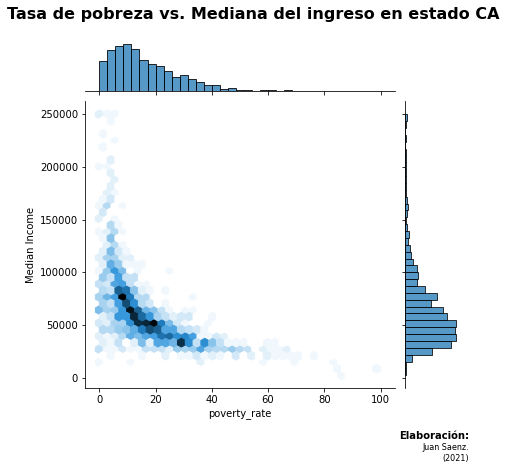

In [51]:
g = sns.jointplot(x = 'poverty_rate',
                  y = 'Median Income',
                  kind = "hex",
                  data = siete[siete['Geographic Area']=='CA'])
g.fig.suptitle("Tasa de pobreza vs. Mediana del ingreso en estado CA",
               fontsize = 16,
               fontweight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 10,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.07,
           "Juan Saenz.\n(2021)",
           fontsize = 8, ha = "right")
plt.show()

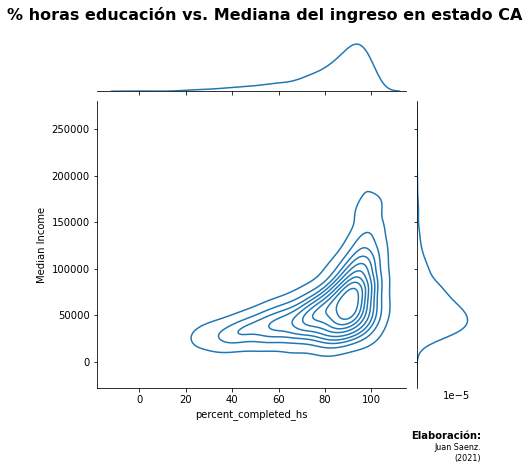

In [52]:
g = sns.jointplot(x = 'percent_completed_hs',
                  y = 'Median Income',
                  kind = "kde",
                  data = siete[siete['Geographic Area']=='CA'])
g.fig.suptitle("% horas educación vs. Mediana del ingreso en estado CA",
               fontsize = 16,
               fontweight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.text(1,-.02,
           "Elaboración:",
           fontsize = 10,
           fontweight = "bold",
           ha = "right")
g.fig.text(1,-.07,
           "Juan Saenz.\n(2021)",
           fontsize = 8, ha = "right")
plt.show()

# Ejercicio 8: 
Utilizando el mismo conjunto de datos del punto 7.a, implemente un modelo de aprendizaje automático que dadas ciertas variables sociodemográficas y del tipo de asesinato policiaco, permita predecir la raza de la persona

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ocho = pd.read_csv('PoliciaAsesinatos.csv', encoding='cp1252')
ocho.head()

In [ ]:
ocho = ocho[['manner_of_death', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 
            'flee','body_camera']].dropna()
ocho.head()

In [55]:
ocho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2534
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          2260 non-null   object 
 1   age                      2260 non-null   float64
 2   gender                   2260 non-null   object 
 3   race                     2260 non-null   object 
 4   city                     2260 non-null   object 
 5   state                    2260 non-null   object 
 6   signs_of_mental_illness  2260 non-null   bool   
 7   threat_level             2260 non-null   object 
 8   flee                     2260 non-null   object 
 9   body_camera              2260 non-null   bool   
dtypes: bool(2), float64(1), object(7)
memory usage: 163.3+ KB


In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
ocho['manner_of_death']=le.fit_transform(ocho['manner_of_death'])
ocho['gender']=le.fit_transform(ocho['gender'])
ocho['city']=le.fit_transform(ocho['city'])
ocho['state']=le.fit_transform(ocho['state'])
ocho['signs_of_mental_illness']=le.fit_transform(ocho['signs_of_mental_illness'])
ocho['threat_level']=le.fit_transform(ocho['threat_level'])
ocho['flee']=le.fit_transform(ocho['flee'])
ocho['body_camera']=le.fit_transform(ocho['body_camera'])
ocho.head()

,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,53.0,1,A,1052,47,1,0,2,0
1,0,47.0,1,W,20,37,0,0,2,0
2,1,23.0,1,H,1252,16,0,1,2,0
3,0,32.0,1,W,1013,4,1,0,2,0
4,0,39.0,1,H,361,5,0,0,2,0


In [57]:
ocho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2534
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          2260 non-null   int32  
 1   age                      2260 non-null   float64
 2   gender                   2260 non-null   int32  
 3   race                     2260 non-null   object 
 4   city                     2260 non-null   int32  
 5   state                    2260 non-null   int32  
 6   signs_of_mental_illness  2260 non-null   int64  
 7   threat_level             2260 non-null   int32  
 8   flee                     2260 non-null   int32  
 9   body_camera              2260 non-null   int64  
dtypes: float64(1), int32(6), int64(2), object(1)
memory usage: 141.2+ KB


In [58]:
from sklearn.model_selection import train_test_split
X = ocho[['manner_of_death', 'age', 'gender', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 
            'flee','body_camera']]
y = ocho['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # por defecto trabaja 0.75 para entrenamiento y 0.25 
#para prueba, random_state se usa para fijar la semilla
print("El vector target de entrenamiento tiene",
len(y_train), "elementos")
print("El vector target de prueba tiene",
len(y_test), "elementos")
print("La matriz de features de entrenamiento tiene",
len(X_train), "elementos")
print("La matriz de features de prueba tiene",
len(X_test), "elementos")

El vector target de entrenamiento tiene 1695 elementos
El vector target de prueba tiene 565 elementos
La matriz de features de entrenamiento tiene 1695 elementos
La matriz de features de prueba tiene 565 elementos


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
knn.score(X_test, y_test) #Estimar la precisión del clasificador en datos futuros, utilizando los datos de prueba.

0.536283185840708

In [61]:
# Predecir nuevas razas teniendo en cuenta el conjunto de prueba
y_pred = knn.predict(X_test)
len(y_pred)

565

In [62]:
entrenamiento = X_train.join(y_train) # X unirlas con base a las filas de y
entrenamiento.head()

,manner_of_death,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race
1943,0,71.0,0,885,43,0,0,2,0,W
381,0,62.0,1,1068,47,1,0,2,0,W
2181,0,32.0,1,743,48,0,1,2,0,B
2514,0,34.0,1,214,4,0,0,2,1,W
1687,0,25.0,1,899,38,0,0,1,0,B


In [63]:
y_pred_data = pd.DataFrame({"race": y_pred})
X_test_data = X_test.reset_index(drop = True)
predicciones = X_test_data.join(y_pred_data)
predicciones.head()

,manner_of_death,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race
0,0,47.0,1,302,50,0,0,2,0,W
1,0,44.0,1,536,15,0,0,2,1,B
2,1,29.0,1,1170,36,1,1,2,0,B
3,0,45.0,1,274,43,0,0,2,0,H
4,0,26.0,1,432,48,0,1,2,0,B


In [64]:
len(predicciones)

565

In [65]:
comparacion = pd.DataFrame({"race_pred": y_pred, "race":y_test})
comparacion.head()

,race_pred,race
547,W,W
1259,B,B
2388,B,B
99,H,B
2049,B,W


In [66]:
#Utilizando el modelo de clasificador k-NN entrenado para clasificar objetos nuevos nunca antes vistos
#Primer ejemplo: alguien que murio por disparo, con 23 años, genero masculino, que vive en Aloha estado OR, sin signos de 
#enfermedad mental, threat_level = Other, flee = Not fleeing y body_camera = False
razas = dict(zip(ocho.race.unique(),['Asian','White','Hispanic','Black','Otro','None']))   
razas
prediction = knn.predict([[0,23,1,20,37,0,1,2,0]])
razas[prediction[0]] #La predicción arroja que la persona sería de habla hispana o raza hispana.

'Hispanic'

In [67]:
razas

{'A': 'Asian',
 'W': 'White',
 'H': 'Hispanic',
 'B': 'Black',
 'O': 'Otro',
 'N': 'None'}